Eileen Zhang 2020/08/10

In [1]:
import numpy as np
import os
import time

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# cifar10 查看

In [2]:
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()

In [4]:
x_train = x_train/255.
x_test = x_test/255.

In [5]:
type(x_train),x_train.shape

(numpy.ndarray, (50000, 32, 32, 3))

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

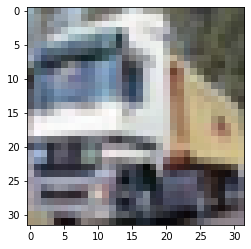

In [7]:
plt.imshow(x_train[1])

0 airplane 										
1 automobile 										
2 bird 										
3 cat 										
4 deer 										
5 dog 										
6 frog 										
7 horse 										
8 ship 										
9 truck

In [9]:
def mlp(units, dropout = 0.2,output_layer=True):
    layers = []
    if(output_layer):
        last = units[-1]
        units = units[:-1]
    for u in units:
        layers.append(keras.layers.BatchNormalization())
        layers.append(keras.layers.Dense(u, activation='relu'))
        layers.append(keras.layers.Dropout(dropout))
    if(output_layer):
        layers.append(keras.layers.Dense(last, activation=keras.activations.softmax))
    return layers

In [10]:
import tensorflow as tf

# vgg16

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

In [25]:
vgg16 = VGG16(include_top=False, weights='imagenet',input_shape=(32,32,3))

In [26]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [27]:
vgg16.trainable = False

In [28]:
layers = [vgg16]
layers.append(keras.layers.Flatten())
layers += mlp([300,20,10])

In [29]:
layers

In [30]:
model = keras.models.Sequential(layers)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               153900    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_10 (Dense)             (None, 20)               

In [32]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
%%time
model.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 414s 265ms/step - loss: 1.5836 - accuracy: 0.4477
Epoch 2/10
1563/1563 [==============================] - 385s 247ms/step - loss: 1.3759 - accuracy: 0.5208
Epoch 3/10
1563/1563 [==============================] - 385s 246ms/step - loss: 1.3136 - accuracy: 0.5445
Epoch 4/10
1563/1563 [==============================] - 379s 242ms/step - loss: 1.2708 - accuracy: 0.5596
Epoch 5/10
1563/1563 [==============================] - 417s 267ms/step - loss: 1.2433 - accuracy: 0.5705
Epoch 6/10
1563/1563 [==============================] - 379s 242ms/step - loss: 1.2243 - accuracy: 0.5763
Epoch 7/10
1563/1563 [==============================] - 410s 263ms/step - loss: 1.1939 - accuracy: 0.5869
Epoch 8/10
1563/1563 [==============================] - 373s 239ms/step - loss: 1.1831 - accuracy: 0.5905
Epoch 9/10
1563/1563 [==============================] - 406s 260ms/step - loss: 1.1617 - accuracy: 0.5984
Epoch 10/10
1563/1563 [=======================

# VGG 19

In [37]:
from tensorflow.keras.applications.vgg19 import VGG19

In [40]:
vgg19 = VGG19(include_top=False, weights='imagenet',input_shape=(32,32,3))
vgg19.trainable = False

In [42]:
layers = [vgg19]
layers.append(keras.layers.Flatten())
layers = layers + mlp([300,100,50,10])

In [43]:
model1 = keras.models.Sequential(layers)

In [45]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 300)               153900    
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 300)               1200      
_________________________________________________________________
dense_17 (Dense)             (None, 100)              

In [47]:
model1.compile(optimizer=opt, loss= keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [48]:
model1.fit(x_train, y_train_cats, epochs= 2)

Epoch 1/2
1563/1563 [==============================] - 505s 323ms/step - loss: 1.7155 - accuracy: 0.4003
Epoch 2/2
1563/1563 [==============================] - 482s 309ms/step - loss: 1.4954 - accuracy: 0.4795


# resnet_v2.ResNet152V2

In [53]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2

In [54]:
resNet152V2 = ResNet152V2(include_top=False, weights='imagenet',input_shape=(32,32,3))
resNet152V2.trainable = False

234553344/234545216 [==============================] - 19s 0us/step


In [55]:
layers = [resNet152V2]
layers.append(keras.layers.Flatten())
layers = layers + mlp([300,100,50,10])

In [56]:
model2 = keras.models.Sequential(layers)
model2.compile(optimizer=opt, loss= keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [57]:
model2.fit(x_train, y_train_cats, epochs= 2)

Epoch 1/2
1563/1563 [==============================] - 438s 280ms/step - loss: 2.0320 - accuracy: 0.2712
Epoch 2/2
1563/1563 [==============================] - 562s 359ms/step - loss: 1.8582 - accuracy: 0.3330
